In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
email_opened = pd.read_csv(r"email_opened_table.csv")

In [3]:
email_opened.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [4]:
email = pd.read_csv(r"email_table.csv")

In [5]:
email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [6]:
email.shape

(100000, 7)

In [7]:
print(email['user_country'].nunique())
print(email['user_country'].unique())
print(email['user_country'].value_counts())




4
['US' 'UK' 'FR' 'ES']
user_country
US    60099
UK    19939
FR     9995
ES     9967
Name: count, dtype: int64


C:\Users\91863\AppData\Local\Temp\ipykernel_20368\249070487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=email, x='user_country', palette='Set2')


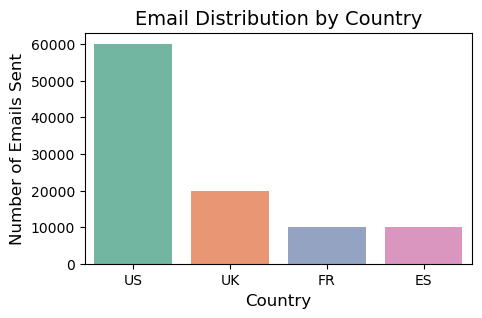

In [8]:
plt.figure(figsize=(5, 3))
sns.countplot(data=email, x='user_country', palette='Set2')


plt.title('Email Distribution by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Emails Sent', fontsize=12)
plt.show()

In [9]:
print(email['email_text'].value_counts())


email_text
long_email     50276
short_email    49724
Name: count, dtype: int64


In [10]:
print(email['email_version'].value_counts())


email_version
generic         50209
personalized    49791
Name: count, dtype: int64


In [11]:
print(email['hour'].value_counts())

hour
9     8529
8     8398
7     8204
10    8180
11    7483
6     7465
5     6551
12    6508
4     5622
13    5581
3     4610
14    4580
2     3676
15    3493
16    2759
1     2703
17    1893
18    1421
19     905
20     656
21     365
22     204
23     145
24      69
Name: count, dtype: int64


In [12]:
print(email['weekday'].value_counts())

weekday
Saturday     14569
Sunday       14387
Monday       14363
Thursday     14277
Friday       14177
Tuesday      14143
Wednesday    14084
Name: count, dtype: int64


In [13]:
clicked_email= pd.read_csv(r"link_clicked_table.csv")

In [14]:
clicked_email.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [15]:
total_emails = email.shape[0]

In [16]:
opened_emails = email_opened.shape[0]

In [17]:
clicked_emails = clicked_email.shape[0]

In [18]:
open_rate = (opened_emails / total_emails) * 100
click_rate = (clicked_emails / total_emails) * 100

print(f"Open Rate: {open_rate:.2f}%")
print(f"Click Rate: {click_rate:.2f}%")

Open Rate: 10.35%
Click Rate: 2.12%


C:\Users\91863\AppData\Local\Temp\ipykernel_20368\3873781322.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="Blues_d")


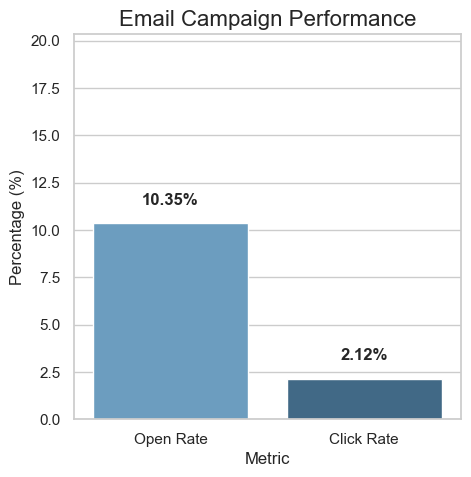

In [19]:

total_sent = email.shape[0]
total_opened = email_opened.shape[0]
total_clicked = clicked_email.shape[0]


metrics = ['Open Rate', 'Click Rate']
values = [total_opened / total_sent * 100, total_clicked / total_sent * 100]


sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.barplot(x=metrics, y=values, palette="Blues_d")

for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.ylim(0, max(values) + 10)
plt.title("Email Campaign Performance", fontsize=16)
plt.ylabel("Percentage (%)")
plt.xlabel("Metric")
plt.show()


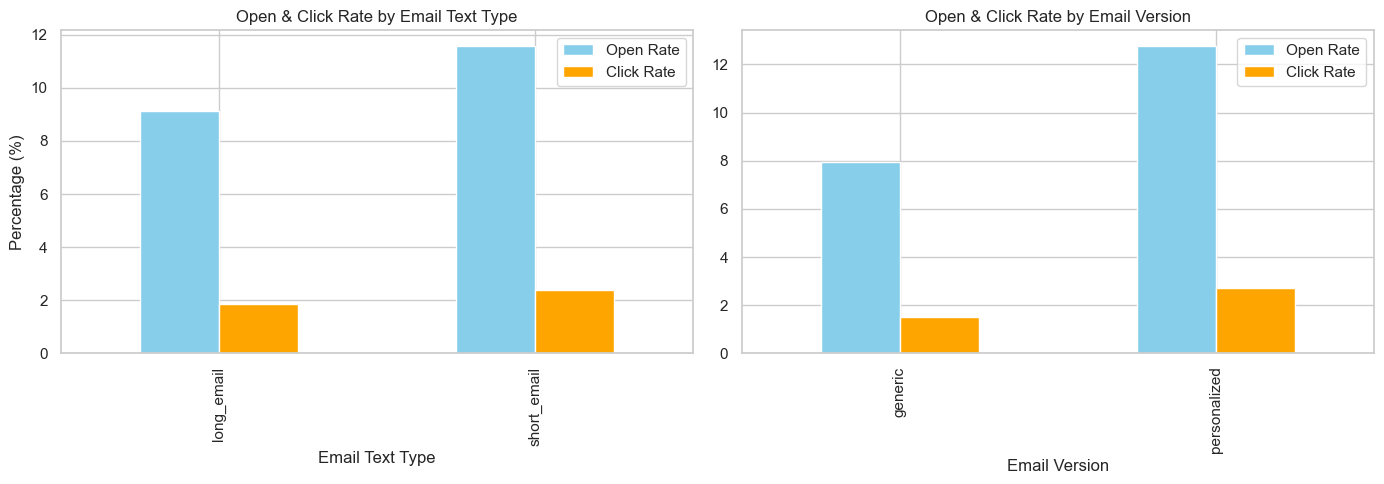

In [20]:

email['opened'] = email['email_id'].isin(email_opened['email_id'])
email['clicked'] = email['email_id'].isin(clicked_email['email_id'])


grouped_text = email.groupby('email_text')[['opened', 'clicked']].mean() * 100
grouped_version = email.groupby('email_version')[['opened', 'clicked']].mean() * 100


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


grouped_text.plot(kind='bar', ax=axes[0], color=['skyblue', 'orange'])
axes[0].set_title('Open & Click Rate by Email Text Type')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel('Email Text Type')
axes[0].legend(["Open Rate", "Click Rate"])


grouped_version.plot(kind='bar', ax=axes[1], color=['skyblue', 'orange'])
axes[1].set_title('Open & Click Rate by Email Version')
axes[1].set_xlabel('Email Version')
axes[1].legend(["Open Rate", "Click Rate"])

plt.tight_layout()
plt.show()


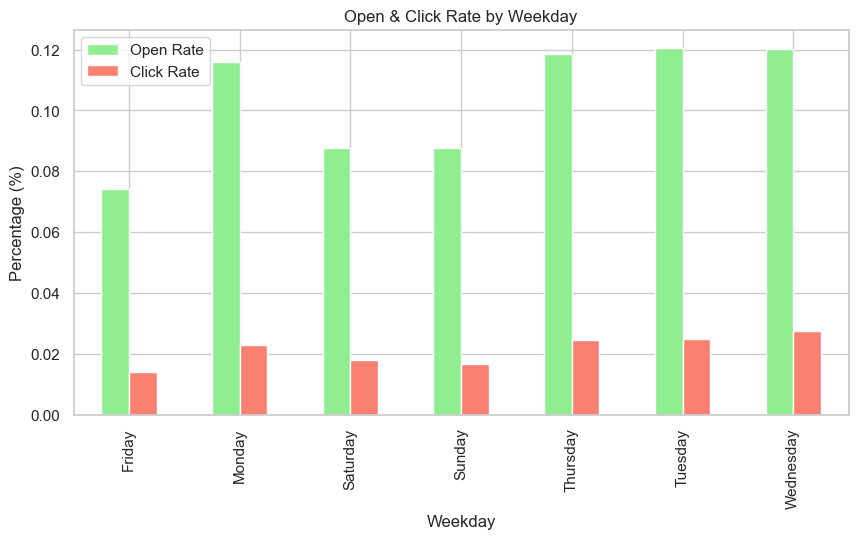

In [21]:
email.groupby('weekday')[['opened', 'clicked']].mean().sort_index().plot(
    kind='bar', figsize=(10, 5), color=['lightgreen', 'salmon'])
plt.title('Open & Click Rate by Weekday')
plt.ylabel('Percentage (%)')
plt.xlabel('Weekday')
plt.legend(['Open Rate', 'Click Rate'])
plt.show()


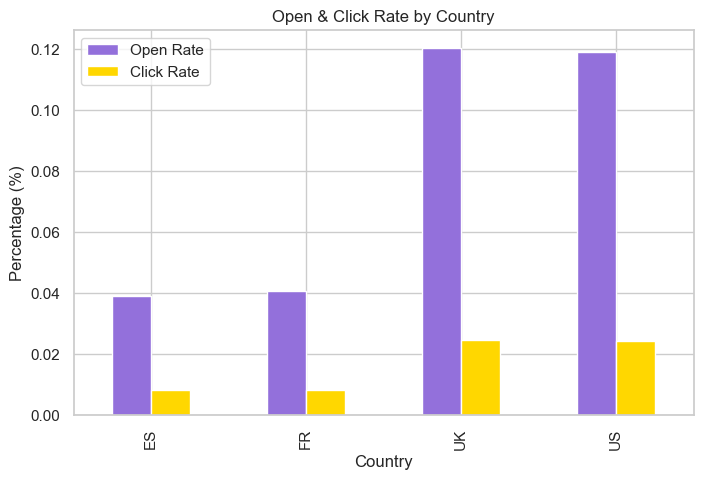

In [22]:
email.groupby('user_country')[['opened', 'clicked']].mean().plot(
    kind='bar', figsize=(8, 5), color=['mediumpurple', 'gold'])

plt.title('Open & Click Rate by Country')
plt.ylabel('Percentage (%)')
plt.xlabel('Country')
plt.legend(['Open Rate', 'Click Rate'])
plt.show()


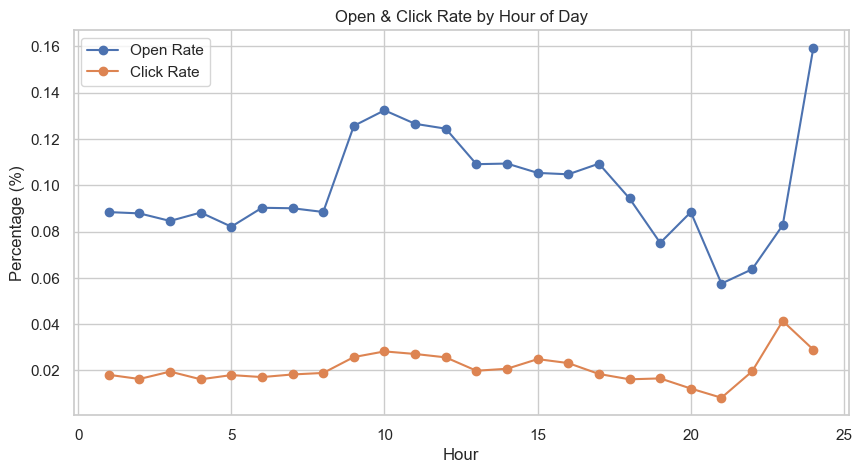

In [23]:
email.groupby('hour')[['opened', 'clicked']].mean().plot(
    kind='line', figsize=(10, 5), marker='o')
plt.title('Open & Click Rate by Hour of Day')
plt.ylabel('Percentage (%)')
plt.xlabel('Hour')
plt.legend(['Open Rate', 'Click Rate'])
plt.grid(True)
plt.show()


In [24]:

email['opened'] = email['email_id'].isin(email_opened['email_id']).astype(int)
email['clicked'] = email['email_id'].isin(clicked_email['email_id']).astype(int)


In [25]:
email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [26]:
from sklearn.preprocessing import LabelEncoder


le_country = LabelEncoder()
le_country.fit(email['user_country'])


for i, class_name in enumerate(le_country.classes_):
    print(f"{i}: {class_name}")


0: ES
1: FR
2: UK
3: US


In [27]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


categorical_columns = ['email_text', 'email_version', 'weekday', 'user_country']


for col in categorical_columns:
    email[col] = le.fit_transform(email[col])





In [28]:
email.corr()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
email_id,1.000000,0.001249,-0.000241,-0.003563,0.003181,0.000223,0.002099,0.000443,-0.001198
email_text,0.001249,1.000000,-0.000283,-0.001611,0.000388,-0.001667,-0.003217,0.040523,0.018519
email_version,-0.000241,-0.000283,1.000000,-0.000827,0.005072,-0.001951,-0.001914,0.079471,0.042208
hour,-0.003563,-0.001611,-0.000827,1.000000,-0.000605,0.001117,0.002986,0.025972,0.011047
weekday,0.003181,0.000388,0.005072,-0.000605,1.000000,-0.001539,-0.002534,0.041544,0.025308
user_country,0.000223,-0.001667,-0.001951,0.001117,-0.001539,1.000000,-0.006096,0.093049,0.040011
user_past_purchases,0.002099,-0.003217,-0.001914,0.002986,-0.002534,-0.006096,1.000000,0.085934,0.105445
opened,0.000443,0.040523,0.079471,0.025972,0.041544,0.093049,0.085934,1.000000,0.421750
clicked,-0.001198,0.018519,0.042208,0.011047,0.025308,0.040011,0.105445,0.421750,1.000000


In [29]:
email.corr()['clicked']


email_id              -0.001198
email_text             0.018519
email_version          0.042208
hour                   0.011047
weekday                0.025308
user_country           0.040011
user_past_purchases    0.105445
opened                 0.421750
clicked                1.000000
Name: clicked, dtype: float64

In [30]:
email.shape

(100000, 9)

In [31]:
email.isnull().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
opened                 0
clicked                0
dtype: int64

In [32]:
email['clicked'].value_counts(normalize=True)

clicked
0    0.97881
1    0.02119
Name: proportion, dtype: float64

In [33]:
email.dtypes

email_id               int64
email_text             int32
email_version          int32
hour                   int64
weekday                int32
user_country           int32
user_past_purchases    int64
opened                 int32
clicked                int32
dtype: object

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


 


X = email.drop(columns=['clicked'])  
y = email['clicked']                  


categorical_cols = ['email_text', 'email_version', 'weekday', 'user_country']
numerical_cols = ['hour', 'user_past_purchases', 'opened'] 


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' 
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (80000, 8)
Test shape: (20000, 8)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score


clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1] 


print(classification_report(y_test, y_pred))

print(" ROC AUC Score:", roc_auc_score(y_test, y_prob))
print(" PR AUC Score:", average_precision_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.23      0.06      0.10       424

    accuracy                           0.98     20000
   macro avg       0.60      0.53      0.54     20000
weighted avg       0.96      0.98      0.97     20000

 ROC AUC Score: 0.9538994369308587
 PR AUC Score: 0.24395529854969747


In [36]:
probs = clf.predict_proba(X_test)
print(probs)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [37]:
import numpy as np
from sklearn.metrics import precision_recall_curve


precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)


f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print("Best threshold:", best_threshold)
print("Best Precision:", precisions[best_index])
print("Best Recall:", recalls[best_index])
print("Best F1 Score:", f1_scores[best_index])


y_pred_new = (y_prob >= best_threshold).astype(int)

print(" Re-evaluated Classification Report:")
print(classification_report(y_test, y_pred_new))


Best threshold: 0.15
Best Precision: 0.2615546218487395
Best Recall: 0.5872641509433962
Best F1 Score: 0.36191817827254125
 Re-evaluated Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     19576
           1       0.26      0.59      0.36       424

    accuracy                           0.96     20000
   macro avg       0.63      0.78      0.67     20000
weighted avg       0.98      0.96      0.96     20000



In [40]:
def predict_click(email_text, email_version, hour, weekday, user_country, user_past_purchases, opened):
    
    input_data = pd.DataFrame([{
        'email_text': email_text,
        'email_version': email_version,
        'hour': hour,
        'weekday': weekday,
        'user_country': user_country,
        'user_past_purchases': user_past_purchases,
        'opened': opened
    }], columns=X.columns)  

    try:

        prob_clicked = clf.predict_proba(input_data)[:, 1]
        threshold = 0.15
        click_prediction = 'Yes' if prob_clicked[0] >= threshold else 'No'
        return prob_clicked[0], click_prediction
    except Exception as e:
        print("Prediction failed:", e)
        return None, None

        







In [41]:
probability, click_prediction = predict_click(
    email_text='Discount Offer',
    email_version='Version A',
    hour=14,
    weekday='Monday',
    user_country='US',
    user_past_purchases=5,
    opened=1
)

if probability is not None:
    print(f"Predicted Probability of Click: {probability:.2f}")
    print(f"Will the user click? {click_prediction}")
else:
    print("Prediction failed. Please check logs.")



Predicted Probability of Click: 0.30
Will the user click? Yes


In [ ]:
print(clf)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['email_text',
                                                   'email_version', 'weekday',
                                                   'user_country'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])


In [42]:
clickers = email[email['clicked'] == 1]
clickers

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
1,966622,0,1,12,3,2,2,1,1
70,849,1,0,16,5,3,5,1,1
115,721625,1,1,6,4,3,7,1,1
145,477022,0,0,7,4,2,4,1,1
156,135729,0,1,12,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...
99826,854874,1,1,10,3,3,6,1,1
99838,46500,1,0,15,5,3,9,1,1
99928,683747,1,1,8,2,3,8,1,1
99946,893770,1,1,3,1,3,11,1,1


In [43]:
clickers['email_text'].value_counts(normalize=True)


email_text
1    0.56017
0    0.43983
Name: proportion, dtype: float64

In [44]:
clickers['email_version'].value_counts(normalize=True)


email_version
1    0.64134
0    0.35866
Name: proportion, dtype: float64

In [45]:
clickers['weekday'].value_counts(normalize=True)


weekday
6    0.183577
5    0.166116
4    0.164700
1    0.155262
2    0.122699
3    0.113733
0    0.093912
Name: proportion, dtype: float64

<Axes: title={'center': 'Click Distribution by Hour'}, xlabel='hour'>

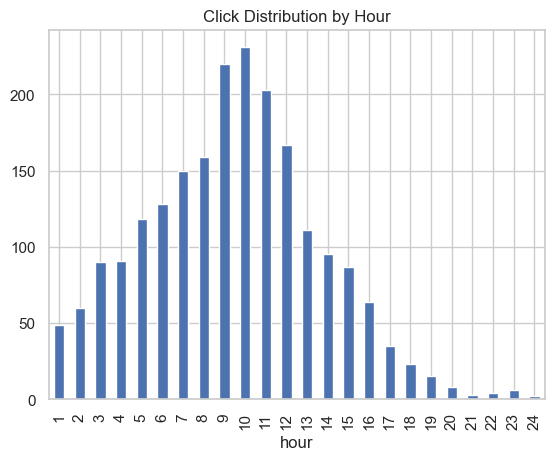

In [46]:
clickers['hour'].value_counts().sort_index().plot(kind='bar', title='Click Distribution by Hour')


In [47]:
clickers['user_country'].value_counts(normalize=True)


user_country
3    0.690892
2    0.232185
0    0.039169
1    0.037754
Name: proportion, dtype: float64

In [48]:
clickers['user_past_purchases'].describe()


count    2119.000000
mean        6.168948
std         3.601982
min         0.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        22.000000
Name: user_past_purchases, dtype: float64